# "A Naive Bayes Framework for Estimating the Competence of an Institution in Representing the Public Interest Applied to the United States Congress"
> "Wherein I make barely reasonable assumptions in order to define a framework which allows public opinion to directly factor into an estimate of the competence of institutions in representing the public"
- toc: true
- branch: master
- badges: true
- comments: true
- categories: []
- image: images/some_folder/your_image.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

## Introduction

In this note I introduce a Naive Bayes framework for estimating the competence of an institution in representing the interest of the public for the simple case of an institution which makes binary decisions informed exclusively by independently voting representatives of the public. 

Making the assumptions 1) that the competence of a voter in representing the public interest can be approximated by a function of the public approval and disapproval ratings of the voter and 2) that the public approval and disapproval ratings of a voter can be approximated by the public approval and disapproval ratings of the political party of the voter, I then apply Gallup's Party Images polling and CSPAN voting records to the framework to estimate, then plot over time the competence of the chambers of the Congress of the United States in representing the public interest. 

## Naive Bayes Framework for Estimating the Competence of an Institution in Representing the Public Interest

An institution can be defined as acting in the public interest when making a decision if it makes the decision most likely to be in the public interest given the available evidence. Under that definition, the competence of an institution in representing the public interest over some time period can be approximated by the decimal-percent agreement between the decisions actually made by the institution during that time period and the decisions which were most likely to be in the public interest given the available evidence. 

Calling the decision most likely to be in the public interest given the available evidence the "epistemic decision" as shorthand, by this definition of competence an institution which always made the epistemic decision would have a competence of $1.0$ for the time period and an institution which never made the epistemic decision would have a competence of $0.0$ for the time period.

If the evidence available to inform each institutional decision is an observed voting profile of a body of representatives of the public coupled to an assumption about the competencies of the representatives in representing the public interest, then the competence of an institution over a time period is the agreement between the decisions actually made by the institution during the time period and the decisions most likely to be in the public interest given the observed representative voting profiles and the assumed representative competence profile.

Therefore, if I can define a method for determining the epistemic decision given an observed voting profile of a body of representatives of the public and an assumed representative competence profile as evidence, then, by comparing the actual institutional decisions to the epistemic decisions determined by the method, I can estimate the competence of an institution in representing the public interest over a time period.

To that end, in this section I develop a Naive Bayes method for calculating the probability a decision is in the public interest given an observed voting profile of representatives of the public and an assumed representative competence profile as evidence. For a given choice between decisions, the epistemic decision is then the determined as the decision with the highest probability of being in the public interest as calculated by the method.

In developing the method, I will 1) review how Bayes theorem can be applied in a binary setting to estimate the probability a decision is correct given some set of evidence, 2) review how an observed voting profile can be used as evidence when coupled with an assumed voter competence profile, and 3) assume that individual voter competence in representing the public interest might be approximated by observing that public's opinion of the voter through approval polling.

### Bayes Theorem for Binary Decisions

Assume a decision must be made between two options - call them option $1$ and option $-1$. Assume one of the options is "correct" - call it option $X$. Assume the decision is to be informed exclusively by a set of evidence $v$, which implies both options are equally probable prior to considering $v$ (lol). 

The respective posterior probabilities of option $1$ and option $-1$ being correct having considered evidence $v$ are then the respective probabilities of observing the evidence $v$ given option $1$ and option $-1$ being correct relative to the total probability of observing the evidence $v$.

$$P(X=1|v) = \frac{P(v|X=1)}{P(v|X=1) + P(v|X=-1)}$$

$$P(X=-1|v) = \frac{P(v|X=-1)}{P(v|X=1) + P(v|X=-1)}$$

Where $P(v|X=1)$ is the probability of observing the evidence $v$ given the correct option being $1$ and $P(v|X=-1)$ is similarly the probability of observing the evidence $v$ given the correct option being $-1$. In general, the probability option $x$ is the correct option given observed evidence $v$ is

$$P(X=x|v) = \frac{P(v|X=x)}{\sum_{x} P(v|X=x)}$$

Where the sum is over all possibilities for the correct option: $1$ and $-1$, in this case. The value of $x$ for which $P(X=x|v)$ is maximized is the option most likely to be correct given the available evidence $v$.

### Voting as Producing Evidence

Assume a body of N voters is to produce the evidence meant to inform a decision between two options - call them option $1$ and option $-1$. Assume one of the options is correct - call it option $X$. By Bayes theorem, The probability that the $x$th option is correct given an observed voting profile $\vec{v}=[v_1,v_2,...v_N]$ as evidence is

$$P(X=x|\vec{v}) = \frac{P(\vec{v}|X=x)}{\sum_{x} P(\vec{v}|X=x)}$$

The decision most likely to be correct given the observed voting profile as evidence is the value of $x$ which maximizes this equation. But, the value of $x$ which maximizes this equation cannot be determined without making assumptions about the form of $P(\vec{v}|X=x)$. Making the Naive Bayes assumption that the voters vote independently conditional on the correct decision, the probability of observing a particular voting profile $\vec{v}$ given the correct option being $x$ can be written as

$$P(\vec{v}|X=x)=\prod_{i=1}^{N}P(v_i|X=x)$$

Still, though, a further assumption about the form of $P(v_i|X=x)$ is necessary in order to make use of the voting profile as evidence. One such assumption is that, for each of $i=1...N$, $P(v_i|X=x)$ is parameterized by a single variable $p_i$ directly identifiable as the probability voter $i$ makes the correct decision in a binary setting, such that

$$P(X=1|v_i=1)=P(X=-1|v_i=-1)=p_i$$
$$P(X=-1|v_i=1)=P(X=-1|v_i=1)=1-p_i$$

Defining the probability voter $i$ makes the corect decision as [the competence of voter][] $i$, the voter competence profile is then the profile $\vec{p}=[p_1,p_2,...,p_N]$. Under this assumption about the form of $P(v_i|X=x)$, the probability of observing the voting profile $\vec{v}$ given the correct choice being the $x$th option and an assumed voter competence profile $\vec{p}$ is

$$P(\vec{v}|X=x,\vec{p})=\prod_{i=1}^{N}p_{i}^{\frac{1+v_ix}{2}}(1-p_{i})^{\frac{1-v_ix}{2}}$$

And the probability that the $x$th option is correct given an observed voting profile and an assumed voter competence profile as evidence becomes

$$P(X=x|\vec{v},\vec{p}) = \frac{1}{1+\prod_{i=1}^{N}(\frac{p_i}{1-p_i})^{-xv_i}}$$

Applying an observed voting profile and an assumed voter competence profile to this function allows it to be used to calculate the probability option $x$ is correct for all $x$, thereby allowing me to identify the value of x which maximizes this equation - the [option most likely to be correct][] given an observed voting profile $\vec{v}$ as evidence.

[the competence of voter]:#0

[option most likely to be correct]:#1



### Competence in Representing the Interest of the Public as a Function of Public Opinion of the Representative

It is of course impossible to know the actual competence of a representative in representing the public interest because there is no way of knowing the exact probability that a representative will make the decision that is in the public interest. Consequently, there is no way to construct a representative competence profile $\vec{p}$ that will allow $P(X=x|\vec{v},\vec{p})$ to be identified as the exact, "correct" probability a decision is in the public interest given a voting profile of a body of representatives of the public as evidence.

But, it is of course possible to approximate the competence of a representative in representing the public interest by defining the probability a representative will make the decision in the public interest as a function of presumably relevant parameters. Ideally, the form of the function and the intepretation of the parameters should correspond to some anylytical assumptions about the nature of representative competence.

I choose to assume that the competence of a representative in representing the interest of a population can be determined by the opinion of the representative held by the population. Because, in this case, the population is the public, I choose to intepret the parameters as corresponding to public opinion of the representative, and to use a function that is able to map public opinion parameters to probabilities.

Perhaps the ideal public opinion parameter would be an aggregation of public opinion polls that ask the question "how much do you trust the representive to make decisions which are in the public interest? Please respond with a number between 0% and 100%, where 0% implies you trust the representative to never make decisions in the public interest and 100% implies you trust the representative to always make decisions in the public interest". The public opinion parameter could then be defined as the average of the responses to that question $\bar{q}$, and mapped to a probability with the function $p=f(\bar{q})=\bar{q}$.

Given a standardized opinion poll asking the public that question for all representatives of the public, the representative competence profile would then take the form 

$$\vec{p}=[p_1, p_2,...,p_N]=[\bar{q_1},\bar{q_2},...,\bar{q_N}]$$.

Unfortunately, opinion polling as a standardized practice is still in its infancy, and this question has not yet been asked of the public as a regular polling item. As a result, the presumably ideal public opinion parameter cannot be used to construct a representative competence profile. Until better opinion polling is available, I will need to rely on whatever opinion parameters I can find that might plausibly correspond to representative competence for a given institution.


## Application to the United States Congress

The chambers of the United States Congress make institutional decisions by majority rule. Generally, each decision is between taking and not taking an institutional action. For each action considered by a chamber, each representative of the chamber has the opportunity to vote Yea or Nay; if the constitutionally appropriate majority of the representatives votes Yea, then the proposed action is taken; if not, then the proposed action is not taken.

Congressional voting profiles and the resulting institutional decisions are available on CSPAN's website [for each roll-call vote][] since 1989. This section identifies public opinion parameters that might plausably parameterize representatives competence profiles for each vote, then, by applying the method defined in the previous section, uses the congressional voting profiles to estimate the corresponding epistemic decisions, and compares those epistemic decisions to the institutional decisions actually made by the houses of Congresses.

[for each roll-call vote]:#2

To that end, I will 1) go over the particular representative competence parameterization I settled on, 2) use the parameterization to estimate the competencies of both chambers of each of the 102nd through 115th Congress individually, and 3) plot the trend competencies of the chambers themselves over time.

### Representative Competence as the Logistic of the Difference Between Public Approval and Public Disapproval of the Representative

In lieu of having the resources necessary to make a more reasonable decision, and because it has been polled somewhat consistently by Gallup since 1993, I choose to identify approval rating and disapproval rating as the opinion parameters that might plausably parameterize representative competence profiles. 

For simplicity, I take the function that maps the chosen opinion parameters to a probability to be the logistic of [the difference between approval rating and disapproval rating][]. This mapping assures that a representative who is more approved of than disapproved of by the public will be more likely than not to vote in the public interest, and vice versa; and that representative competence increases diminishingly as the difference between representative approval and disapproval increases.

[the difference between approval rating and disapproval rating]:#3

Unfortunately, opinion polling regarding individual representatives is sparse, tending to happen only when public opinion of the representative is considered electorally relevant. Consequently, I'm forced to assume that the public approval and disapproval ratings of a representative can be approximated by those of the political party of the representative. 

Because the public frequently elects representatives based on their party affiliation instead of their representative capacity, and because representatives frequently vote along their party lines instead of according to their responsibilities as representatives, I feel that this assumption is at least heuristically reasonable. This assumption allows me to use the long-running Gallup Party Images poll to estimate the competencies of Democratic and Republican representatives at the time of each congressional vote from 1993 - the first year the poll ran - to the present.

Again for simplicity, in applying these assumptions I choose to base the competency of a representative for a given vote on the Party Images polling completed on the date closest to the date of the vote:

$$p_D=\frac{1}{1+e^{-(approval_{D,t}-disapproval{D,t})}}$$
$$p_R=\frac{1}{1+e^{-(approval_{R,t}-disapproval{R,t})}}$$

Where $approval_{D,t}$ is the decimal-percent approval rating of the Democratic party as reported on date $t$, the closest date to the vote a poll was completed; $disapproval_{D,t}$ is the decimal-percent disapproval rating of the Democratic party as reported on the same date; and $approval_{R,t}$ and $disapproval_{R,t}$ are similarly the decimal-percent approval and disapproval ratings for the Republican party. 

For example, polls concluding on September 15th 2019 reported the Democratic party as having decimal-percent approval and disapproval ratings of .48 and .50, respectively, and the Republican party as having decimal-percent approval and disapproval ratings of .43 and .55. Consequently, for dates of votes closer to September 15th 2019 than to any other date polls concluded, I take the competencies of Democratic and Republican representatives, $p_D$ and $p_R$, to be 

$$p_D=\frac{1}{1+e^{-(.48-.50)}} = .495$$
$$p_R=\frac{1}{1+e^{-(.43-.55)}} = .470$$

The figure below displays the competencies of Democratic and Republican representatives from 1993 to the present, calculated using the above method. These are the values which I take as representative competencies while producing the agreement plots displayed in the next section.

In [1]:
#collapse-hide

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import datetime
import requests
from bs4 import BeautifulSoup as soup

def logistic(attack,defense):
    x = 1/(1+math.exp(-1*(attack-defense)))
    return x

party_approval_dict = {} # {time: {party:value}}

approval_url = 'https://news.gallup.com/poll/24655/party-images.aspx'
r = requests.get(approval_url)
approval_page = soup(r.text,'lxml')
democratic_approval_table = approval_page.find_all('table')[0]
republican_approval_table = approval_page.find_all('table')[1]

td = pd.read_html(str(democratic_approval_table))[0]
favorable_d = list(td.loc[:,'Favorable'][0:-1].loc[:,'%'])
unfavorable_d = list(td.loc[:,'Unfavorable'][0:-1].loc[:,'%'])

tr = pd.read_html(str(republican_approval_table))[0]
favorable_r = list(tr.loc[:,'Favorable'][0:-1].loc[:,'%'])
unfavorable_r = list(tr.loc[:,'Unfavorable'][0:-1].loc[:,'%'])

dates = list(td.iloc[:,[0]][0:-1].iloc[:,0])
dates = [' '.join(x.split()[0:2] + [x.split()[2]]).split('-')[0] for x in dates]

for i in range(len(dates)):
    try:
        ad = float(favorable_d[i])/100
        dd = float(unfavorable_d[i])/100
        ar = float(favorable_r[i])/100
        dr = float(unfavorable_r[i])/100
    except:
        continue
    
    vald = logistic(ad,dd)
    valr = logistic(ar,dr)
    
    party_approval_dict[dates[i]] = {'D':round(vald,3),'R':round(valr,3)}

def PartyRating(date): #takes date of format 'December 2012, 21' and finds party strength closest to that date
    d_get_compare = time.mktime(time.strptime(date,'%B %d, %Y'))
    d_list = [time.mktime(time.strptime(x,'%Y %b %d')) for x in party_approval_dict.keys()]
    d_deltas = [abs(d_get_compare - x) for x in d_list]
    index_min = np.argmin(d_deltas)
    d_closest = d_list[index_min]
    d = time.strftime('%Y %b %d',time.localtime(d_closest))
    if d.split()[-1][0] == '0':
        d = ' '.join(d.split()[0:-1]) + ' ' + d.split()[-1][1:]
    return party_approval_dict[d]


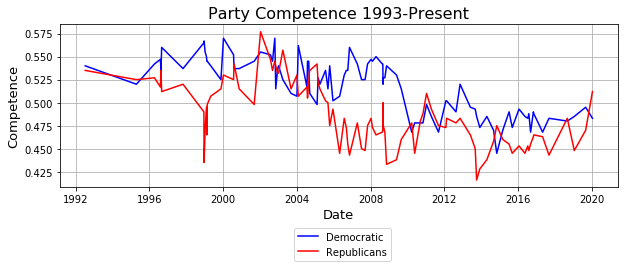

In [2]:
#collapse-hide

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

rate_data = sorted([[time.mktime(time.strptime(x,'%Y %b %d')),party_approval_dict[x]] for x in party_approval_dict.keys()], key=lambda x: x[0])
ds = [datetime.datetime.fromtimestamp(x[0]) for x in rate_data]
dem_rates = [x[1]['D'] for x in rate_data]
rep_rates = [x[1]['R'] for x in rate_data]

plt.figure(figsize=(10,3))
plt.grid()
plt.plot(ds, dem_rates,'b')
plt.plot(ds, rep_rates,'r')

plt.xlabel('Date',fontsize=13)
plt.ylabel('Competence',fontsize=13)
plt.title('Party Competence 1993-Present',fontsize=16)
plt.legend(['Democratic','Republicans'], loc=(.42,-.45))
plt.show()

This competence parameter assumption could be improved by fitting a trend line to the poll results then taking the competencies from the exact date on the fit line instead of from the date of the nearest reported poll result. The assumptions could be further improved by conducting and aggregating a number of national polls which asks the approval question for every representative. Preferably the polls would be taken at regular intervals and in accordance with  regular methodology. This would allow representatives to be treated as individuals instead of as homogeneous party members. Of course, if one were to go through all that effort, they might as well ask a more relevant question.

### Institutional-Epistemic Decision Agreement Plots for the House and Senate

In [4]:
#collapse-hide

import dill
import os

data_dir = 'data\cspan\\'

senate_votes = {}
house_votes = {}

for congress_number in range(103,116):
    
    senate_votes[congress_number] = [{},{},{}]
    house_votes[congress_number] = [{},{},{}]
    
    with open(data_dir + 'cspan_c' + str(congress_number) +'_senate.pkl','rb') as f:
        known_votes = dill.load(f)
        senate_votes[congress_number][0].update(known_votes[0])
        senate_votes[congress_number][1].update(known_votes[1])
        senate_votes[congress_number][2].update(known_votes[2])
        
    with open(data_dir + 'cspan_c' + str(congress_number) +'_house.pkl','rb') as f:
        known_votes = dill.load(f)
        house_votes[congress_number][0].update(known_votes[0])
        house_votes[congress_number][1].update(known_votes[1])
        house_votes[congress_number][2].update(known_votes[2])
        
'''
with open(data_dir + 'cspanSenate.pkl','rb') as f:
    known_votes = dill.load(f)
    senate_votes[0].update(known_votes[0])
    senate_votes[1].update(known_votes[1])
    senate_votes[2].update(known_votes[2])
       
with open(data_dir + 'cspanHouse.pkl','rb') as f:
    known_votes = dill.load(f)
    house_votes[0].update(known_votes[0])
    house_votes[1].update(known_votes[1])
    house_votes[2].update(known_votes[2])
'''

"\nwith open(data_dir + 'cspanSenate.pkl','rb') as f:\n    known_votes = dill.load(f)\n    senate_votes[0].update(known_votes[0])\n    senate_votes[1].update(known_votes[1])\n    senate_votes[2].update(known_votes[2])\n       \nwith open(data_dir + 'cspanHouse.pkl','rb') as f:\n    known_votes = dill.load(f)\n    house_votes[0].update(known_votes[0])\n    house_votes[1].update(known_votes[1])\n    house_votes[2].update(known_votes[2])\n"

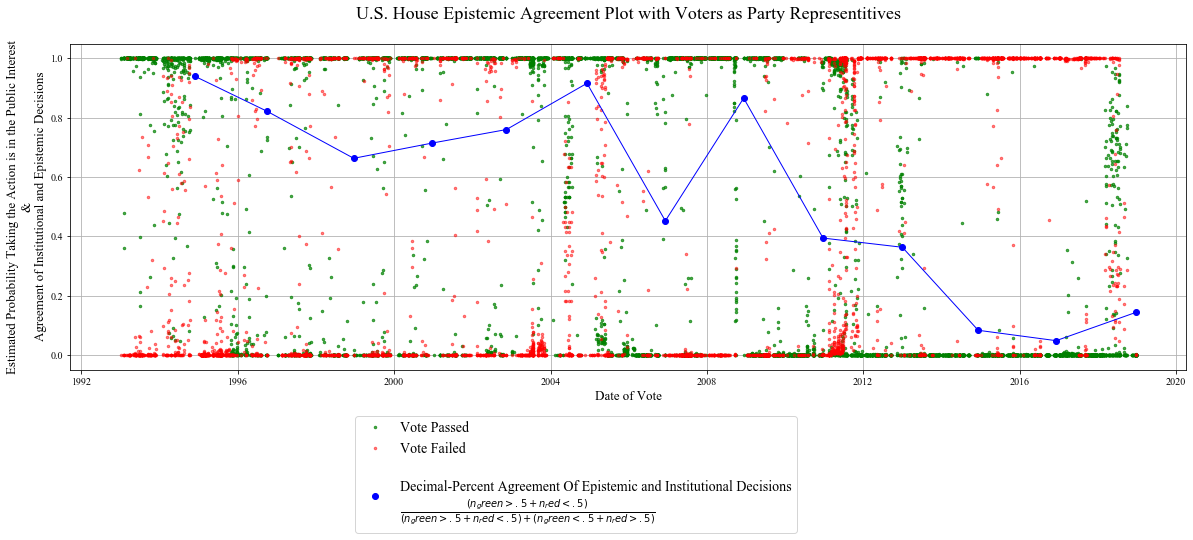

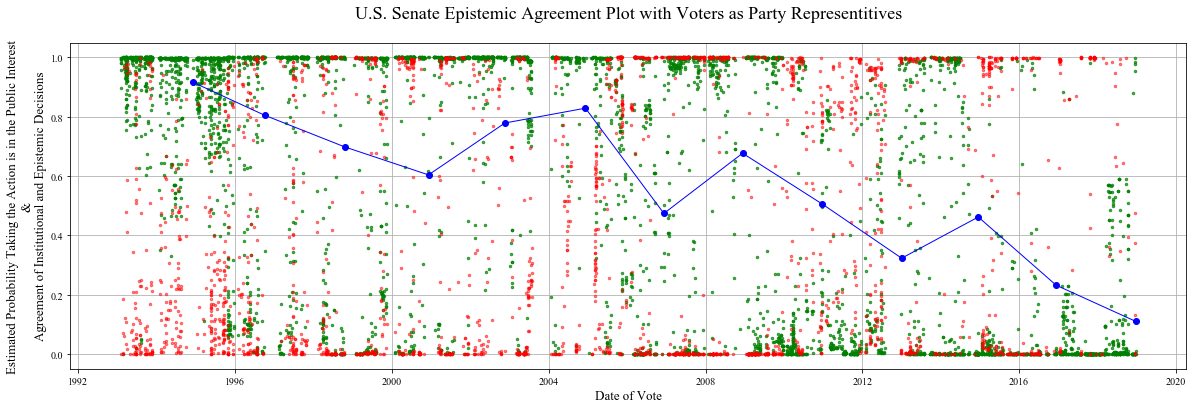

In [17]:
#collapse-hide

chambers = ['House','Senate']
for chamber in chambers:
    
    if chamber == 'House':
        known_votes = house_votes     
    elif chamber == 'Senate':
        known_votes = senate_votes
    
    ############################################################
    #calculate probabilities
    ############################################################
  
    def NaiveBayes(x,prior,p,v):
        factors = [(p[i]/(1-p[i]))**(-1*x*v[i]) for i in range(len(p))]
        probability = 1/(1 + ((1-prior)/prior) * np.prod(factors) )
        return probability
    
    pass_words = ['confirmed','passed','agreed to','sustained']
    yes_vote_words = ['Aye','Yes','Yea','Guilty']
    no_vote_words = ['Nay','No','Not Guilty']
    
    prob_dict = {}
    
    for congress_num in house_votes.keys():
        
        bill_result_dict = known_votes[congress_num][0]
        senator_vote_dict = known_votes[congress_num][1]
        senator_party_dict = known_votes[congress_num][2]
        
        prob_dict[congress_num] = {}
        for bill in bill_result_dict.keys():
            date = ' '.join(bill_result_dict[bill]['date'].split()[0:-1])
            date_party_approval_dict = PartyRating(date)
            
            competences = []
            votes = []
            for senator in sorted(bill_result_dict[bill]['voters'].keys()):
                try:
                    if senator_party_dict[senator] == 'Democratic':
                        competence = date_party_approval_dict['D']
                    elif senator_party_dict[senator] == 'Republican':
                        competence = date_party_approval_dict['R']
                    else:
                        #print('why no favoribility poll for independents?',senator)
                        continue

                    vote = bill_result_dict[bill]['voters'][senator]
                    competences.append(competence)
                    votes.append(vote)
                except:
                    continue

            vs = []
            cs = []
            for voter_idx in range(len(votes)):
                if votes[voter_idx] in yes_vote_words:
                    vs.append(1)
                elif votes[voter_idx] in no_vote_words:
                    vs.append(-1)
                else:
                    #print('wait what is: ' + str(votes[voter_idx]))
                    continue

                cs.append(competences[voter_idx])

            prob = NaiveBayes(1,.5,cs,vs)
            prob_dict[congress_num][bill] = prob
    
    
    ############################################################
    #calculate congress competency
    ############################################################
    
    def ForecastQuality(trues, forecast):
        a = 0
        b = 0
        c = 0
        d = 0
        for i in range(len(trues)):
            if forecast[i] == 1 and trues[i] == 1:
                a += 1
            elif forecast[i] == 1 and trues[i] == 0:
                b += 1
            elif forecast[i] == 0 and trues[i] == 0:
                d += 1
            elif forecast[i] == 0 and trues[i] == 1:
                c += 1
                
        pcorrect = (a+d)/float(a+b+c+d)
        quality = [round(pcorrect,3)]
        
        return quality
    
    '''
    def CongressQuality_time(t_i,t_f): 
        
        epistemic = []
        congressional = []
        
        for congress_num in prob_dict.keys():
            for bill in prob_dict[congress_num].keys():
                bill_date = ' '.join(bill_result_dict[bill]['date'].split()[0:-1])
                bill_date_compare = time.mktime(time.strptime(bill_date,'%B %d, %Y'))
                if t_i <= bill_date_compare < t_f:

                    if prob_dict[congress_num][bill] > .5:
                        epistemic.append(1)
                    elif prob_dict[congress_num][bill] < .5:
                        epistemic.append(0)   
                    else:
                        continue

                    if bill_result_dict[bill]['status'] == 'PASS':
                        congressional.append(1)
                    else:
                        congressional.append(0)
       
        congress_quality = ForecastQuality(epistemic,congressional)
        return congress_quality
    
    
    max_date = max([time.mktime(time.strptime(' '.join(bill_result_dict[bill]['date'].split()[0:-1]),'%B %d, %Y')) for bill in bill_result_dict])
    min_date = min([time.mktime(time.strptime(' '.join(bill_result_dict[bill]['date'].split()[0:-1]),'%B %d, %Y')) for bill in bill_result_dict])
    n_points = 13
    date_increment = (max_date - min_date)/n_points
    date_ranges = [min_date + x*date_increment for x in range(n_points)]
    
    accuracies = []
    quality_dates = []
    t_f = 'init'
    for date_idx in range(len(date_ranges)):
        if t_f != date_ranges[-1]:
            t_i = date_ranges[date_idx]
            t_f = date_ranges[date_idx + 1]
            cq = CongressQuality(t_i,t_f)
            accuracies.append(cq[0])
            quality_dates.append(datetime.datetime.fromtimestamp(t_f))
        else:
            continue  
            
    
    t_f = 'init'
    accuracies = []
    quality_dates = []
    for date_idx in range(len(date_ranges)):
        if t_f != date_ranges[-1]:
            t_i = date_ranges[date_idx]
            t_f = date_ranges[date_idx + 1]
            cq = CongressQuality(t_i,t_f)
            accuracies.append(cq[0])
            quality_dates.append(datetime.datetime.fromtimestamp(t_f))
        else:
            continue
    '''       
            
    def CongressQuality_number(congress_number):
        epistemic = []
        congressional = []
        for bill in prob_dict[congress_num].keys():
                
            if prob_dict[congress_num][bill] > .5:
                epistemic.append(1)
            elif prob_dict[congress_num][bill] < .5:
                epistemic.append(0)   
            else:
                continue

            if known_votes[congress_num][0][bill]['status'] == 'PASS':
                congressional.append(1)
            else:
                congressional.append(0)
       
        congress_quality = ForecastQuality(epistemic,congressional)
        
        return congress_quality

    
    accuracies = []
    quality_dates = []
    for congress_num in prob_dict.keys():
        congress_quality = CongressQuality_number(congress_num)
        quality_date_raw = max([time.mktime(time.strptime(' '.join(known_votes[congress_num][0][bill]['date'].split()[0:-1]),'%B %d, %Y')) for bill in known_votes[congress_num][0]])
        quality_date_parsed = datetime.datetime.fromtimestamp(quality_date_raw)
        accuracies.append(congress_quality[0])
        quality_dates.append(quality_date_parsed)
        
    ############################################################
    # plot results
    ############################################################

    
    date_prob_pairs_passed = []
    date_prob_pairs_failed = []
    weird_ones = []
    
    for congress_num in prob_dict.keys():
        for bill in known_votes[congress_num][0].keys():
            try:
                date = known_votes[congress_num][0][bill]['date']
                date_datetime = time.strptime(date,'%B %d, %Y %I:%M%p')
                date_epoch = time.mktime(date_datetime)
                prob = prob_dict[congress_num][bill]
                if prob == .5:
                    #these ones messed up in data download
                    continue
                pair = [date_epoch,prob,bill]
                if known_votes[congress_num][0][bill]['status'] == 'PASS':
                    date_prob_pairs_passed.append(pair)
                else:
                    date_prob_pairs_failed.append(pair)
            except:
                continue
        
        
    plt.figure(figsize=(20,6))
    plt.grid()
    plt.rcParams["font.family"] = "Times New Roman"
    
    date_prob_pairs_passed = sorted(date_prob_pairs_passed, key=lambda x: x[0])
    dates_passed = [datetime.datetime.fromtimestamp(x[0]) for x in date_prob_pairs_passed]
    probs_passed = [x[1] for x in date_prob_pairs_passed]
    plt.plot(dates_passed, probs_passed,'g.',markersize = 5,alpha = .7)
    
    date_prob_pairs_failed = sorted(date_prob_pairs_failed, key=lambda x: x[0])
    dates_failed = [datetime.datetime.fromtimestamp(x[0]) for x in date_prob_pairs_failed]
    probs_failed = [x[1] for x in date_prob_pairs_failed]
    plt.plot(dates_failed, probs_failed, 'r.', markersize = 5,alpha = .5)    
    
    plt.plot(quality_dates, accuracies,'bo')
    plt.plot(quality_dates, accuracies,'b',linewidth=1)
    
    
    plt.ylabel('Estimated Probability Taking the Action is in the Public Interest\n&\nAgreement of Institutional and Epistemic Decisions',fontsize=13)
    plt.xlabel('Date of Vote',fontsize=13)
    plt.title(chamber + '-Epistemic Agreement Plot with Voters as Party Representitives\n',fontsize=18)
    
    if chamber == chambers[0]:
        plt.legend(['Vote Passed','Vote Failed','\nDecimal-Percent Agreement Of Epistemic and Institutional Decisions\n' + r'$\frac{(n_green>.5+n_red<.5)}{(n_green>.5+n_red<.5) + (n_green<.5+n_red>.5)}$'], loc=(.255,-.5),fontsize=14)


The vertical position of each blue dot represents the estimated competence of a chamber of a congress in representing the public interest during its tenure; and their horizontal positions are the last date that the congress made an institutional decision. 

Each green/red dot represents an action voted on by a chamber of congress; its color indicates whether or not the action was taken, and its vertical position is the estimated probability taking it was in the public interest given the observed voting profiles and assumed representative competence profiles. 

By my chosen definition of institutional competence, a perfectly competent institution would have all green dots above .5 vertically and all red dots below .5 vertically, indicating that it always made the decision most likely to be in the public interest given the available evidence.

The competencies of the House and the Senate, as so defined, appear have decayed dramatically over the last generation. The decay reflects the transition of our political parties from trustworthy to untrustworthy in the eyes of the public; once the parties crossed the competence threshold of $.5$, they became more likely to vote against the public interest than for it. Across the threshold, individual representatives are less reliable than a coin flip; a coin with Yea on one side and Nay on the other is more likely to vote in the public interest than a representative of the public. In fact, across the threshold, each vote by a representative for an option becomes evidence against it.

If both political parties have a representative competence below $.5$, then unanimous majority decisions are estimated as having an approximately $0\%$ chance of being in the public interest because all the evidence points to the contrary. If, both political parties had a representative competence above $0.5$, though, unanimous majority decisions would be estimated as having an approximately $100\%$ chance of being in the public interest because all the evidence is in its favour. 

Because congressional voting data only started to be digitized in 1989 and Gallup only started to poll party images in 1993, there is no convenient way for me to compare the trajectories observed here to earlier trends.

## Footnotes

###### 1
$x=1$ will be the option most likely to be correct if  $\prod_{i=1}^{N}(\frac{p_i}{1-p_i})^{-xv_i} < 1$, or, applying basic logarithm rules, if $\sum_{i=1}^N v_i w_i > 0$ where $w_i=ln(\frac{p_i}{1-p_i})$. This is recognizable as the weighted majority decision rule with optimal weights. See https://papers.nips.cc/paper/5253-consistency-of-weighted-majority-votes.pdf. For a viewpoint on the idea that conensus-based decisions cannot be separated from evidence-based decisions in clinical decision making, see https://jamanetwork.com/journals/jama/fullarticle/2739030?resultClick=1. 

###### 2
Of course, this method excludes non-roll-call votes, which is a major drawback. Why are only roll-call votes recorded again? Seems dumb.

###### 3
A better way of doing it would be to incorporate Not Sure. As is, Approval=0.8 and Disapproval=0.2 leads to the same competence as Approval=0.3 and Disapproval=0.1, for example. Perhaps it would factor into a discrimination parameter, to borrow from the language of item response theory. Another improvement would be adding a parameter that forces  Approval=1.0, Disapproval=0.0, Not Sure=0.0 to map to a competence of 1.0; Approval=0.0, Disapproval=1.0, Not Sure=0.0 to map to a competence of 0.0; and Approval=0.0, Disapproval=0.0, Not Sure=1.0 to map to a competence of 0.5.

###### 0
There are subtle differences between voter competence as defined here and institutional competence as defined above. Voter competence as defined here represents the "actual probability" the voter makes the decision "actually in the public interest", but institutional competence as defined above represents a "measurement of the probability" the institution makes the decision "most likely to be in the public interest given the voting profile as evidence". 

In the first place there is no gaurantee that the decision "mostly likely to be in the public interest given the voting profile as evidence" will reflect the decision "actually in the public interest", and in the second place there is no gaurentee that the "measurement" of the probability will reflect the "actual" probability.

[datetime.datetime(1994, 12, 1, 0, 0), datetime.datetime(1996, 10, 3, 0, 0), datetime.datetime(1998, 10, 21, 0, 0), datetime.datetime(2000, 12, 7, 0, 0), datetime.datetime(2002, 11, 19, 0, 0), datetime.datetime(2004, 12, 8, 0, 0), datetime.datetime(2006, 12, 9, 0, 0), datetime.datetime(2008, 12, 11, 0, 0), datetime.datetime(2010, 12, 22, 0, 0), datetime.datetime(2013, 1, 1, 0, 0), datetime.datetime(2014, 12, 16, 0, 0), datetime.datetime(2016, 12, 10, 0, 0), datetime.datetime(2018, 12, 21, 0, 0)]
